In [1]:
options(warn = -1)

In [2]:
library(rgdal)
library(readxl)
library(dplyr)
library(tools)
library(lubridate)
library(stringr)

Loading required package: sp

rgdal: version: 1.5-23, (SVN revision 1121)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.2.1, released 2020/12/29
Path to GDAL shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.2.1, January 1st, 2021, [PJ_VERSION: 721]
Path to PROJ shared files: C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.4-5
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading rgdal.
Overwritten PROJ_LIB was C:/Users/clid1852/Documents/R/win-library/4.0/rgdal/proj


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following

In [3]:
source("functions.R")

In [4]:
path <- "T:/Data/LTD Data/BikeOnBuses/Monthly/"

In [5]:
excel_sheets(paste0(path,"LTD Bike Count_2013.xlsx"))

[1] "bike count_Jan13"  "bike count_Feb13"  "bike count_Mar13" 
 [4] "bike count_May13"  "bike count_Jun13"  "bike count_Jul13" 
 [7] "bike count_Aug13"  "bike count_Sept13" "bike count_Nov13" 
[10] "bike count_Dec13"

In [6]:
files <- file_path_sans_ext(list.files(path))

In [7]:
files

[1] "LTD Bike Count_2013" "LTD Bike Count_2014" "LTD Bike Count_2015"
[4] "LTD Bike Count_2016" "LTD Bike Count_2017" "LTD Bike Count_2018"
[7] "LTD Bike Count_2019" "LTD Bike Count_2020" "LTD Bike Count_2021"

In [8]:
for(file in files){
    if(file == "LTD Bike Count_2013"){
        data <- readExcel(fileName=paste0(file, ".xlsx"))
    }else{
        ndata <- readExcel(fileName=paste0(file, ".xlsx"))
        data <- rbind(data, ndata)
    }
    print(file)
}

[1] "LTD Bike Count_2013"
[1] "LTD Bike Count_2014"
[1] "LTD Bike Count_2015"
[1] "LTD Bike Count_2016"
[1] "LTD Bike Count_2017"
[1] "LTD Bike Count_2018"
[1] "LTD Bike Count_2019"
[1] "LTD Bike Count_2020"
[1] "LTD Bike Count_2021"


In [9]:
tail(data)

,stop,srv,date,block,trip_end,time,route,dir,stop_name,bus,odometer,desc,qty,MonthYear,longitude,latitude
,<chr>,<chr>,<dttm>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
832741,09972,wkd,2021-12-30,913,1899-12-31 16:37:00,1899-12-31 15:33:00,EmX,I,International Way Station West Inbound,6106,99.42,bike on rack,1,December 2021,-123.042,44.08849
832742,09972,wkd,2021-12-23,901,1899-12-31 11:56:00,1899-12-31 10:54:00,EmX,I,International Way Station West Inbound,9105,67.76,bike on rack,1,December 2021,-123.042,44.08849
832743,09972,wkd,2021-12-22,911,1899-12-31 12:36:00,1899-12-31 11:35:00,EmX,I,International Way Station West Inbound,15103,55.21,bike on rack,1,December 2021,-123.042,44.08849
832744,09972,wkd,2021-12-22,905,1899-12-31 13:58:00,1899-12-31 12:56:00,EmX,I,International Way Station West Inbound,9105,78.66,bike on rack,2,December 2021,-123.042,44.08849
832745,09972,wkd,2021-12-01,907,1899-12-31 21:49:00,1899-12-31 20:48:00,EmX,I,International Way Station West Inbound,9101,167.86,bike on rack,2,December 2021,-123.042,44.08849
832746,09972,wkd,2021-12-03,911,1899-12-31 16:57:00,1899-12-31 16:01:00,EmX,I,International Way Station West Inbound,6105,102.93,bike inside bus,1,December 2021,-123.042,44.08849


In [10]:
months <- c("April", "October")
years <- 2013:2019

In [11]:
for(year in years){
    if(year==2017){
        ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                        fileName = paste0(year, ".xlsx"),
                        sheetName = "bike counts")
        df <- rbind(df, ndf)
        print(year)
    }else{
        for(month in months){
            if(year==2013 & month=="April"){
                df <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
            }else{
                ndf <- readSheet(path = "T:/Data/LTD Data/BoardingSince2011/", 
                            fileName = paste0(month, " ", year, ".xlsx"),
                            sheetName = "bike counts")
                if(year==2013 & month=="October"){
                    df <- rbind(ndf, df)
                }else{
                    df <- rbind(df, ndf)
                }  
            }
            print(paste(year, month))
        }  
    }

}

[1] "2013 April"
[1] "2013 October"
[1] "2014 April"
[1] "2014 October"
[1] "2015 April"
[1] "2015 October"
[1] "2016 April"
[1] "2016 October"
[1] 2017
[1] "2018 April"
[1] "2018 October"
[1] "2019 April"
[1] "2019 October"


In [12]:
df <- df[month(df$date) %in% c(4, 10),]

In [13]:
data <- rbind(data, df)

In [14]:
dim(data)

[1] 1020188      16

In [15]:
data <- unique(data)

In [16]:
dim(data)

[1] 993150     16

In [17]:
write.csv(data, paste0('T:/Tableau/tableauBikesOnBuses/Datasources/MonthlyBikesOnBuses.csv'), row.names = FALSE)

In [17]:
range(data$date)

[1] "2013-01-02 UTC" "2021-11-15 UTC"

In [24]:
MPOBound <- readOGR(dsn = "V:/Data/Transportation", layer="MPO_Bound")

OGR data source with driver: ESRI Shapefile 
Source: "V:\Data\Transportation", layer: "MPO_Bound"
with 1 features
It has 3 fields


In [18]:
length(unique(data$route))

[1] 36

In [19]:
aggdata <- aggregate(x=list(qty = data$qty), by=list(stop_name = data$stop_name), FUN=sum)

In [20]:
locdata <- aggregate(x=list(latitude = data$latitude, longitude= data$longitude), 
                     by=list(stop_name = data$stop_name), FUN=first)

In [21]:
aggdata <- merge(aggdata, locdata, by='stop_name')

In [22]:
spdf <- df2spdf(aggdata, 'longitude', 'latitude')

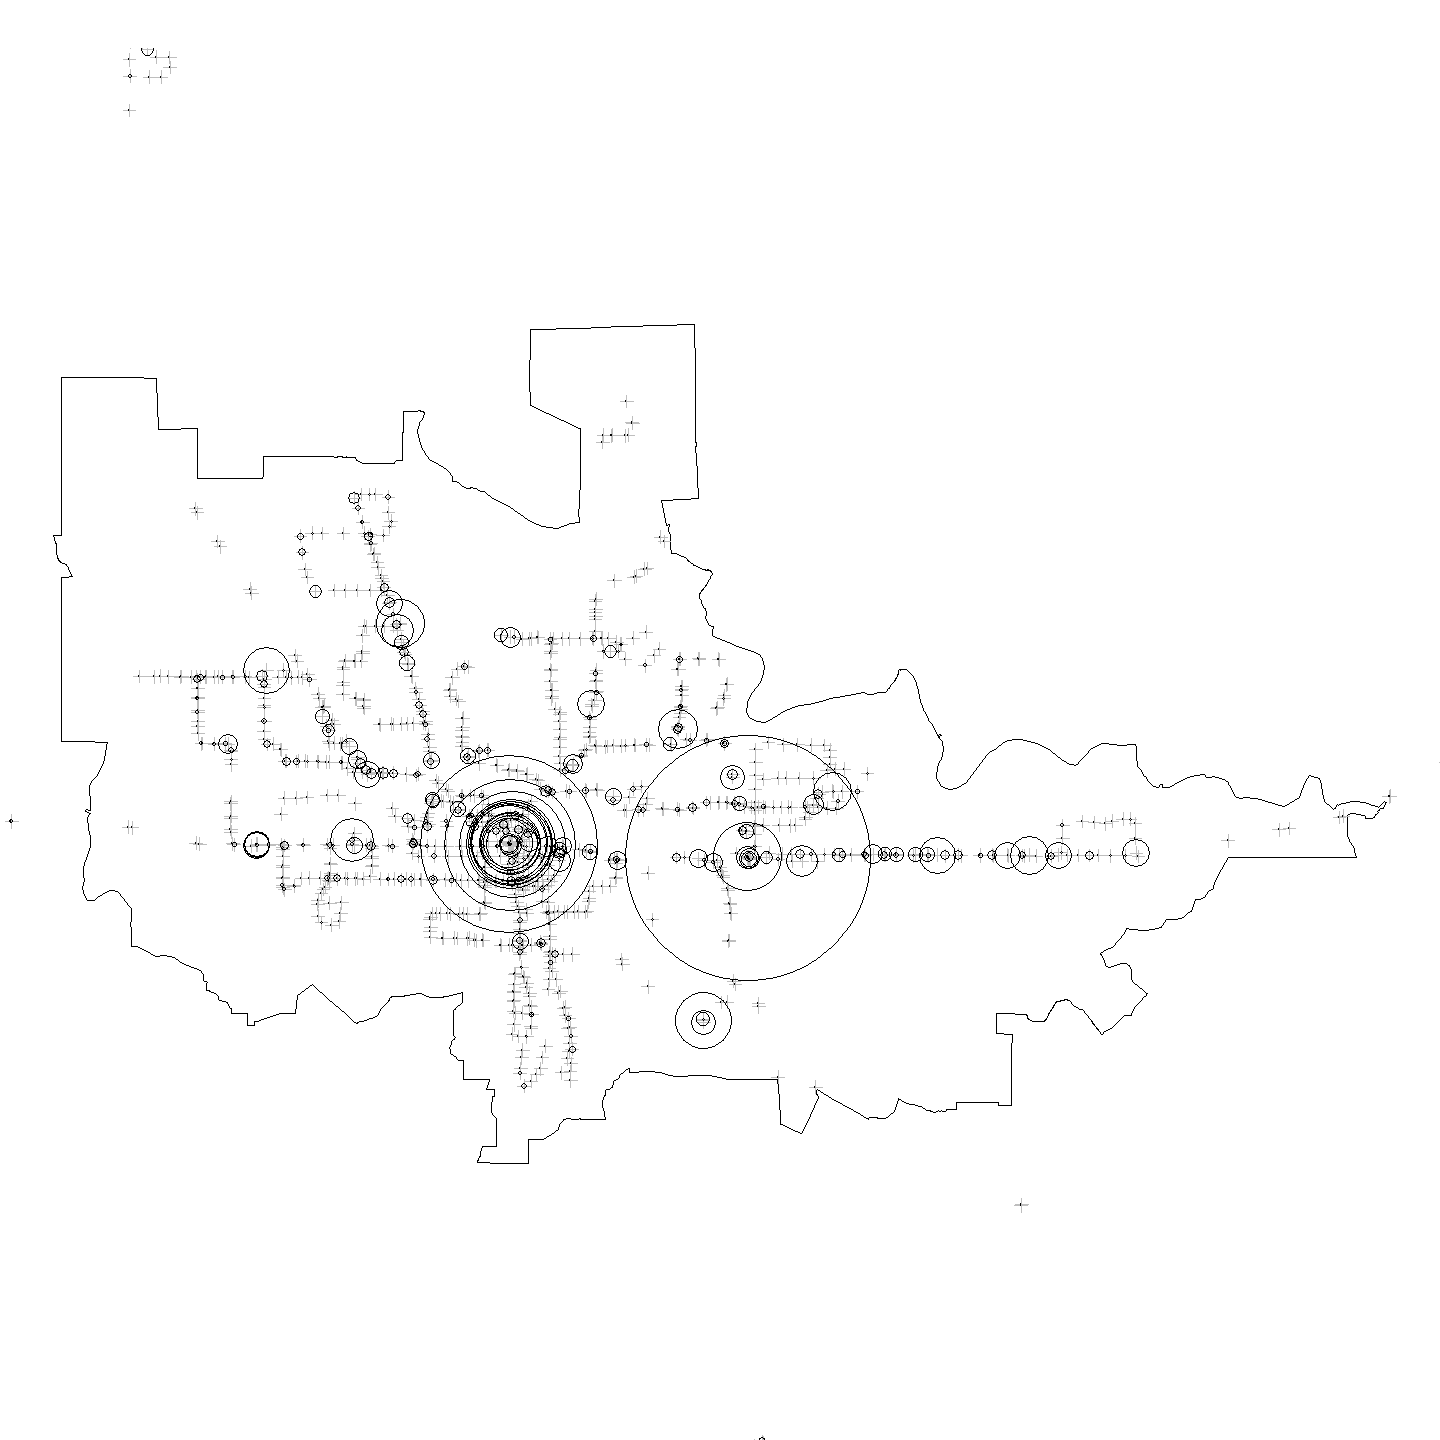

In [25]:
options(repr.plot.width=12, repr.plot.height=12)
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/2000)

In [26]:
spdf@data <- spdf@data[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), spdf@data$stop_name),]

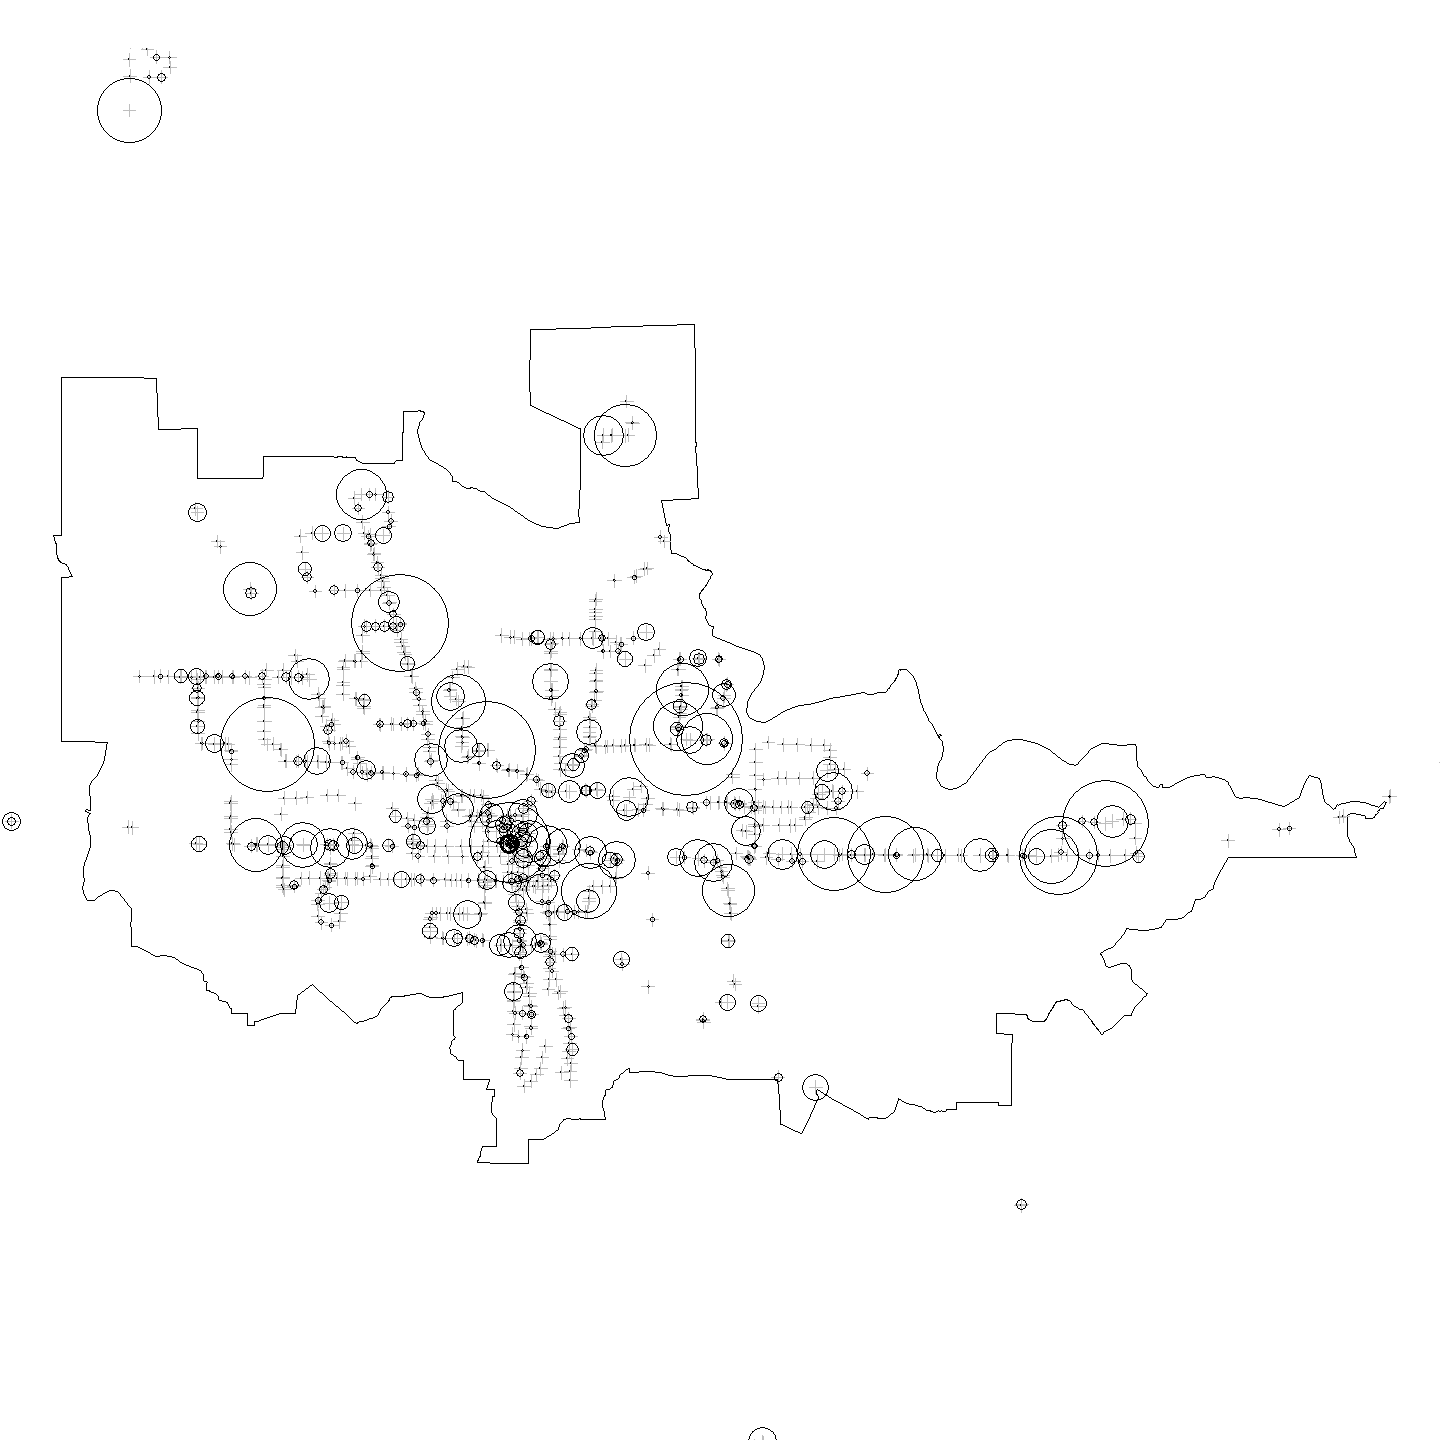

In [27]:
par(mfrow=c(1,1),mar=c(0,0,2,0))
plot(MPOBound)
plot(spdf, add=TRUE, col='grey')
points(spdf$longitude, spdf$latitude, cex=spdf$qty/1000)

In [28]:
outdata <- aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date), Location = data$stop_name), FUN=sum)

In [29]:
head(locdata)

,stop_name,latitude,longitude
,<chr>,<dbl>,<dbl>
1,"""E"" Street Station",44.05092,-123.0221
2,"""F"" Street Station",44.05118,-123.0232
3,"""Q"" Street Station inbound",44.06277,-123.0262
4,"""Q"" Street Station outbound",44.06332,-123.0262
5,(^) N/S of Hwy 126 (MP 23.8) W of Leaburg Dam,44.13587,-122.6134
6,(^) N/S of Lost Crk (Dexter),43.91483,-122.8129


In [30]:
names(locdata) <- c('Location', 'Latitude', 'Longitude')

In [31]:
outdata <- merge(outdata, locdata, by = 'Location')

In [32]:
dim(outdata)

[1] 9548    5

In [33]:
outdata <- outdata[rev(order(outdata$Counts)),]

In [34]:
sdata <- outdata[!grepl(paste(c("Springfield Station, Bay", "Eugene Station, Bay"),collapse = "|"), outdata$Location),]

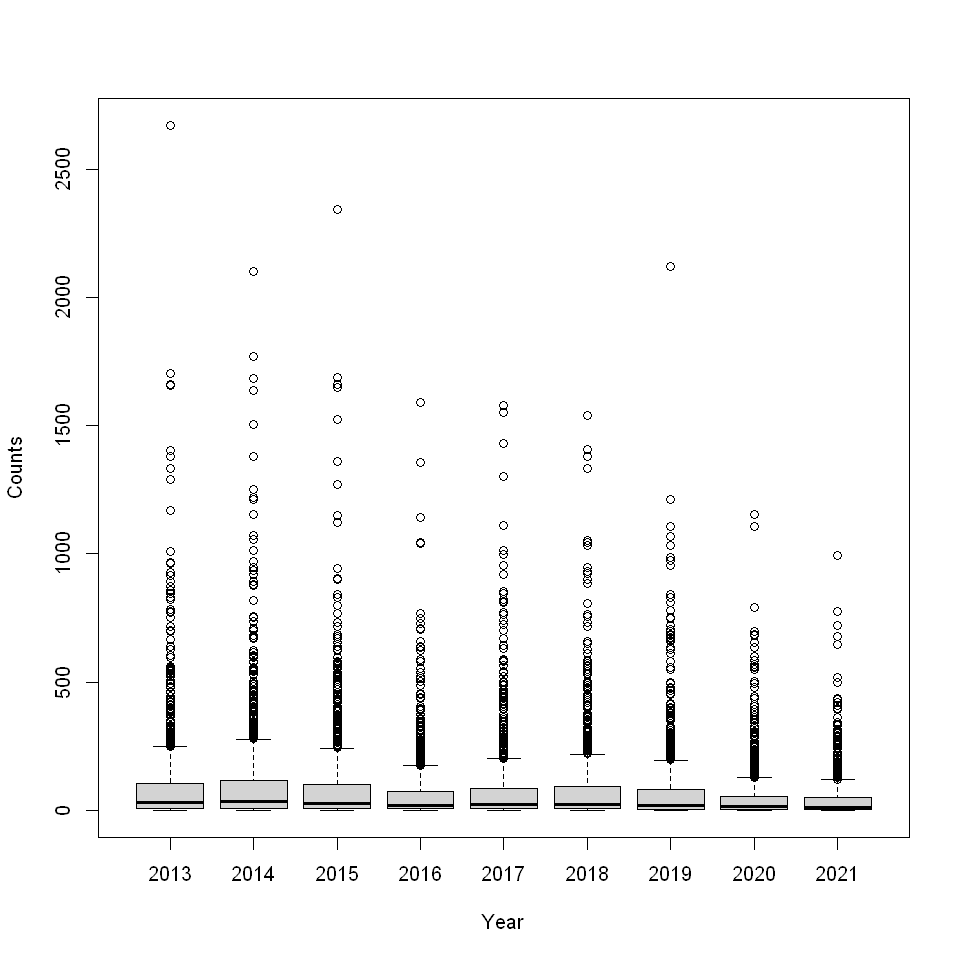

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
boxplot(Counts~Year,data=sdata)

In [105]:
#outdata$Growth <- with(outdata[,c('Location', 'Year', 'Counts')], ave(Counts, Location,
#                     FUN=function(x) c(NA, diff(x)/x[-length(x)]) ))

In [37]:
unique(outdata$Year)

[1] 2013 2014 2015 2018 2017 2019 2016 2020 2021

In [38]:
names(outdata)

[1] "Location"  "Year"      "Counts"    "Latitude"  "Longitude"

In [39]:
for(loc in unique(outdata$Location)){
    years <- sort(unique(outdata[outdata$Location == loc,"Year"]))
    for(yr in years){
        if(yr==min(years)){
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- NA
        }else{
            i <- which(years==yr)
            x1 <- outdata[outdata$Location==loc & outdata$Year==yr,"Counts"]
            x2 <- outdata[outdata$Location==loc & outdata$Year==years[i-1],"Counts"]
            n <- yr - years[i-1]
            outdata[outdata$Location==loc & outdata$Year==yr,"Growth"] <- (x1-x2)/(n*x2)
        }
    }
}

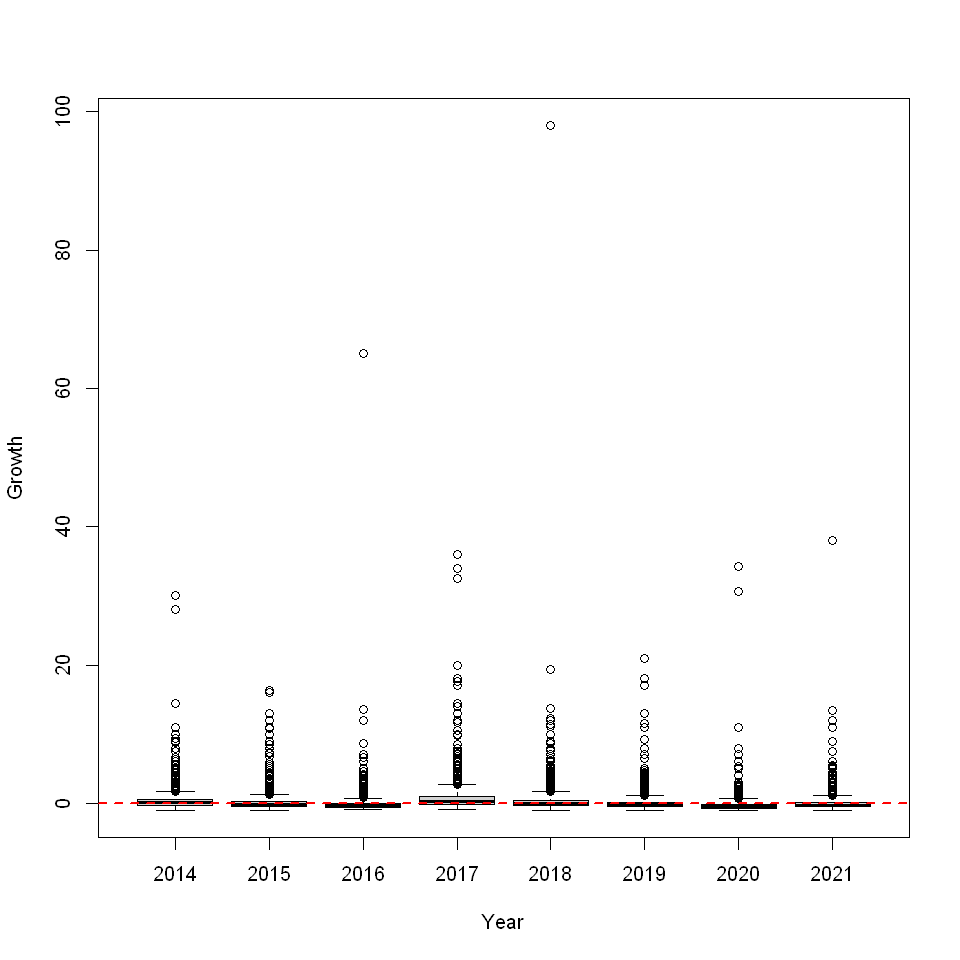

In [41]:
boxplot(Growth~Year,data=outdata)
abline(h=0, col='red', lwd=2, lty=2)

In [43]:
df <- transform(aggregate(x=list(Counts = data$qty), by=list(Year = year(data$date)), FUN=sum), Growth=ave(Counts, 
                         FUN=function(x) c(NA, diff(x)/x[-length(x)])))

In [44]:
df

Year,Counts,Growth
<dbl>,<dbl>,<dbl>
2013,173635,NA
2014,183700,0.057966424
2015,163960,-0.107457812
2016,114387,-0.302348134
2017,138272,0.208808693
2018,136964,-0.009459616
2019,120353,-0.121280044
2020,70859,-0.411240268
2021,55492,-0.216867300


In [45]:
routes_stops <- unique(data[,c('route', 'stop_name')])

In [46]:
names(routes_stops) <- c("Route", "Location")

In [47]:
output <- merge(outdata, routes_stops, by="Location")

In [48]:
write.csv(output, paste0('T:/Tableau/tableauBikesOnBuses/Datasources/AggregatedBikesOnBuses.csv'), row.names = FALSE)